In [11]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from matplotlib import pyplot as plt
# import mpl_axes_aligner

import seaborn as sns
import zipfile
from cycler import cycler

pd.options.display.float_format = '{:.4f}'.format


# global plotting settings
plt.style.use(['ggplot'])

default_cycler = (plt.rcParams['axes.prop_cycle'][:4]  +
                  cycler(linestyle=['-', '--', ':', '-.']))

plt.rcParams.update({'axes.grid' : True, 
                     'axes.facecolor' : 'white', 
                     'axes.edgecolor' : '.15',
                     'axes.labelcolor' : 'black',
                     'yaxis.labellocation' : 'center',
                     'lines.marker' : '.',
                     'lines.linestyle' : 'None',
                     'grid.color' : '.8',
                     'axes.prop_cycle' : default_cycler,
                     'figure.figsize' : (10*1.8, 5.65*1.8),
                     'mathtext.default' : 'regular'
                    })

# plt.rc('axes', prop_cycle=default_cycler)

data_dir = f'/home/otto/data/atmos-flux-data/methane-gapfill/data_dir/'
data_dir = os.path.join(os.getcwd(), 'methane-gapfill', 'data')

## Plot methane-gapfill test results

In [13]:
project = 'ATMOS_20240516'

# predictors = ['baseline','basemet','basesoil','baseflux','basemetsoil','basefluxsoil','all']
predictors = ['baseline','basemet','basesoil','baseflux','basefluxvar', 'basemetsoil','basefluxsoil','all'] #0422
labels = ['baseline','+met','+soil','+flux', '+fluxvar', '+metsoil','+fluxsoil','all']

# predictors = ['baseline','basemet','basesoil','baseflux','basefluxvar'] #0425 for now
# labels = ['baseline','+met','+soil','+flux', '+fluxvar']

models = ['rf']

tests = pd.concat([pd.read_csv(os.path.join(data_dir, f'{project}_{subset}', 'models', model, 'predictors', 'test_results.csv')).assign(pred_subset = subset) for model in models for subset in predictors],
              ignore_index = True)

training = pd.concat([pd.read_csv(os.path.join(data_dir, f'{project}_{subset}', 'models', model, 'predictors', 'training_results.csv')).assign(pred_subset = subset, model = model) for model in models for subset in predictors],
                    ignore_index = True)

# training[training['model']=='ann'].boxplot(column = ['nmae', 'pr2'], by='pred_subset')

In [14]:
tests.loc[(tests['model'].str.contains('rf')) & (tests['pred_subset'].str.match('baseflux')), :]

,mse,mae,nmae,r2,pr2,bias,calibration,sharpness,normalized_sharpness,calibration_scaled,sharpness_scaled,normalized_sharpness_scaled,site,model,predictors_subset,predictors,pred_subset
3,278.2507,9.8169,0.5602,0.0941,0.0958,0.6132,0.1725,3.9778,0.2270,0.9449,71.1151,4.0578,ATMOS_20240516_baseflux,rf,predictors,DOY;sin_DOY;cos_DOY;air_temperature;RS;wind_sp...,baseflux
4,274.8803,9.6548,0.5509,0.1050,0.1064,0.6285,0.1491,3.4247,0.1954,0.9422,67.9706,3.8784,ATMOS_20240516_basefluxvar,rf,predictors,DOY;sin_DOY;cos_DOY;air_temperature;RS;wind_sp...,basefluxvar
6,272.5275,9.6455,0.5504,0.1127,0.1140,0.5186,0.1662,3.8201,0.2180,0.9512,64.6138,3.6869,ATMOS_20240516_basefluxsoil,rf,predictors,DOY;sin_DOY;cos_DOY;air_temperature;RS;wind_sp...,basefluxsoil


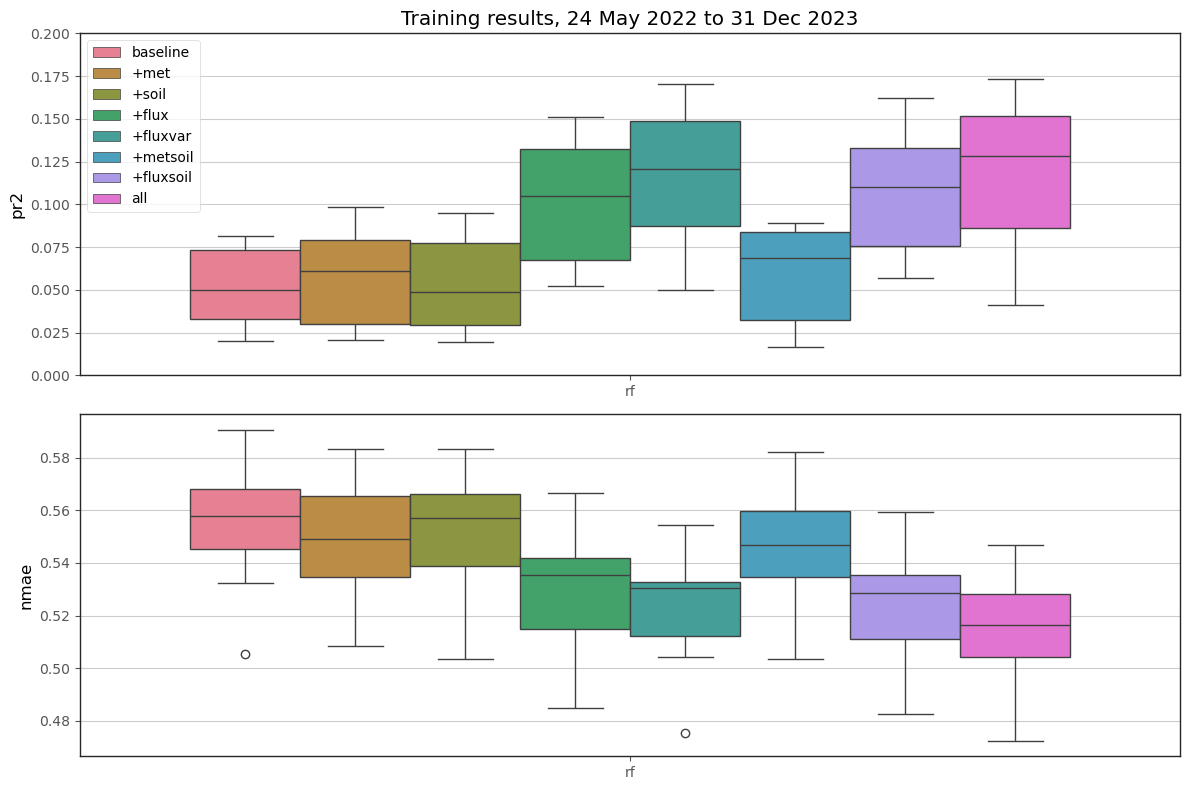

In [35]:
fig, ax = plt.subplots(2,1, figsize=(12,8))
g1 = sns.boxplot(x='model', y='pr2', hue='pred_subset', data = training, ax = ax[0])
g2 = sns.boxplot(x='model', y='nmae', hue='pred_subset', data = training, ax = ax[1])

ax[1].get_legend().remove()
ax[0].set(xlabel = '', 
          title = 'Training results, 24 May 2022 to 31 Dec 2023',
          ylim = [0,0.2],
         )
h, l = ax[0].get_legend_handles_labels()
ax[0].legend(handles=h, labels=labels, loc='upper left')
ax[1].set_xlabel(None)
# ax[1].set(xlabel = None, ylim = [0.5,0.65])
plt.tight_layout()

plt.savefig(f'./output/methane-gapfill_{datetime.now().strftime("%Y%m%d")}_training20240516.png', dpi=300)

C:\Users\ottob\AppData\Local\Temp\ipykernel_2136\1750305093.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels)
C:\Users\ottob\AppData\Local\Temp\ipykernel_2136\1750305093.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(labels)
C:\Users\ottob\AppData\Local\Temp\ipykernel_2136\1750305093.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(labels)


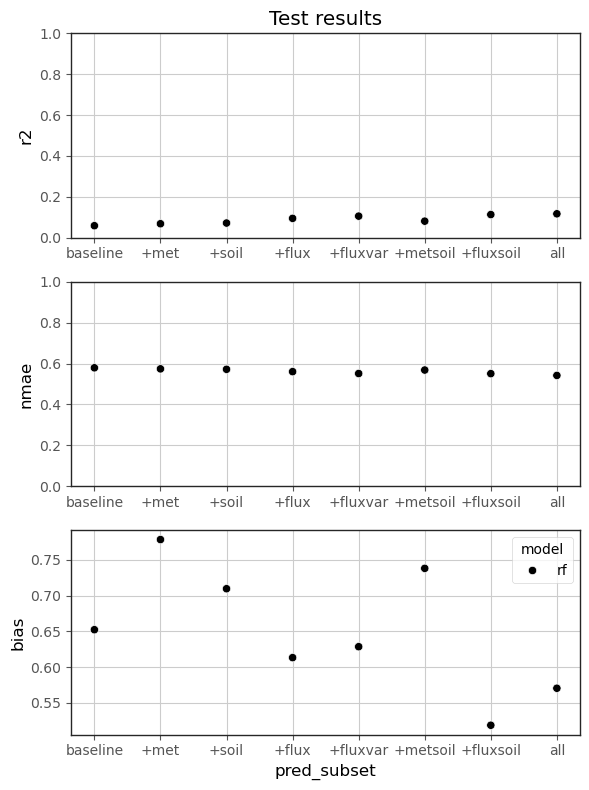

In [37]:
fig, ax = plt.subplots(3,1,figsize = (6, 8))
sns.scatterplot(x='pred_subset',y='r2',style='model', color = 'k', data = tests, ax = ax[0])
sns.scatterplot(x='pred_subset',y='nmae',style='model', color = 'k', data = tests, ax = ax[1])
sns.scatterplot(x='pred_subset',y='bias',style='model', color = 'k', data = tests, ax = ax[2])

ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[0].set(ylim = [0,1], xlabel = None, title = 'Test results')
ax[1].set(ylim = [0,1], xlabel = None)
# ax[2].set(ylim = [0,1])
ax[0].set_xticklabels(labels)
ax[1].set_xticklabels(labels)
ax[2].set_xticklabels(labels)
plt.tight_layout()

plt.savefig(f'./output/methane-gapfill_{datetime.now().strftime("%Y%m%d")}_tests.png', dpi=300)